# Sign Game Server

Game Plan:

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping



In [2]:
from sign_game.ml.landmarks import Landmarks

objc[36984]: Class CaptureDelegate is implemented in both /Users/calebgarfinkel/.pyenv/versions/3.10.6/envs/sign-game-server/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x2800c8860) and /Users/calebgarfinkel/.pyenv/versions/3.10.6/envs/sign-game-server/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x29c08a5a0). One of the two will be used. Which one is undefined.
objc[36984]: Class CVWindow is implemented in both /Users/calebgarfinkel/.pyenv/versions/3.10.6/envs/sign-game-server/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x176fd0a68) and /Users/calebgarfinkel/.pyenv/versions/3.10.6/envs/sign-game-server/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x29c08a5f0). One of the two will be used. Which one is undefined.
objc[36984]: Class CVView is implemented in both /Users/calebgarfinkel/.pyenv/versions/3.10.6/envs/sign-game-server/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x176fd0a9

In [3]:
landmark = Landmarks()

In [4]:
# !pip list

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Package                  Version   Editable project location
------------------------ --------- ----------------------------------------------------------
absl-py                  1.4.0
anyio                    3.6.2
appnope                  0.1.3
argon2-cffi              21.3.0
argon2-cffi-bindings     21.2.0
arrow                    1.2.3
asttokens                2.2.1
astunparse               1.6.3
attrs                    22.2.0
backcall                 0.2.0
beautifulsoup4           4.11.2
bleach                   6.0.0
cachetools               5.3.0
certifi                  2022.12.7
cffi                     1.15.1
charset-normalizer       3.1.0
click                    8.1.3
comm                     0.1.2
contourpy                1.0.7
cycler                   0.11.0
debugpy                  1.6.6
decorator                5.1.1
defusedxml               0.7.1
executing                1.2.0
fastapi                  0.93.0
fastjsonschema           2.16.3
flatbuffers              23

protobuf 3.11.0

## Later Code

In [5]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from tensorflow.keras.callbacks import EarlyStopping


# def initialize_model():
#     model = Sequential()
#     model.add(LSTM(units=, activation='tanh', return_sequence=True, inputshape=()))
#     model.add(LSTM(units=, activation='tanh', return_sequences=True))
#     model.add(LSTM(units=, activation='tanh', return_sequences=False))
#     model.add(Dense(, activation='relu'))
#     model.add(Dense(, activation='relu'))
#     model.add(Dense(26, activation='softmax'))
#     return model

# def compile_model(model):
#     model.compile(loss='categorical_crossentropy',
#                   optimizer='adam',
#                   metrics=['accuracy'])
#     return model

# def train_model(model: Model,
#                 X: np.ndarray,
#                 y: np.ndarray):
#     es = EarlyStopping(monitor='val_loss',
#                        patience=,
#                        restore_best_weights=True,
#                        verbose=0)
    
#     history = model.fit(X, y, epochs=1000, callbacks=[es], verbose=0)
#     return model, history

## Dataset Preprocessing

In [6]:
# Dataset
df = pd.read_csv('../raw_data/hand-landmarks.csv')

In [7]:
df.shape

(1815, 65)

In [8]:
df.columns

Index(['Unnamed: 0', 'WRIST_x', 'WRIST_y', 'WRIST_z', 'THUMB_CMC_x',
       'THUMB_CMC_y', 'THUMB_CMC_z', 'THUMB_MCP_x', 'THUMB_MCP_y',
       'THUMB_MCP_z', 'THUMB_IP_x', 'THUMB_IP_y', 'THUMB_IP_z', 'THUMB_TIP_x',
       'THUMB_TIP_y', 'THUMB_TIP_z', 'INDEX_FINGER_MCP_x',
       'INDEX_FINGER_MCP_y', 'INDEX_FINGER_MCP_z', 'INDEX_FINGER_PIP_x',
       'INDEX_FINGER_PIP_y', 'INDEX_FINGER_PIP_z', 'INDEX_FINGER_DIP_x',
       'INDEX_FINGER_DIP_y', 'INDEX_FINGER_DIP_z', 'INDEX_FINGER_TIP_x',
       'INDEX_FINGER_TIP_y', 'INDEX_FINGER_TIP_z', 'MIDDLE_FINGER_MCP_x',
       'MIDDLE_FINGER_MCP_y', 'MIDDLE_FINGER_MCP_z', 'MIDDLE_FINGER_PIP_x',
       'MIDDLE_FINGER_PIP_y', 'MIDDLE_FINGER_PIP_z', 'MIDDLE_FINGER_DIP_x',
       'MIDDLE_FINGER_DIP_y', 'MIDDLE_FINGER_DIP_z', 'MIDDLE_FINGER_TIP_x',
       'MIDDLE_FINGER_TIP_y', 'MIDDLE_FINGER_TIP_z', 'RING_FINGER_MCP_x',
       'RING_FINGER_MCP_y', 'RING_FINGER_MCP_z', 'RING_FINGER_PIP_x',
       'RING_FINGER_PIP_y', 'RING_FINGER_PIP_z', 'RING_FINGER

In [9]:
df.drop(columns=df.columns[0], axis=1,  inplace=True)

In [10]:
df['TARGET'].value_counts()

A    70
B    70
Y    70
X    70
W    70
V    70
U    70
S    70
R    70
Q    70
P    70
O    70
N    70
M    70
L    70
K    70
J    70
I    70
H    70
G    70
F    70
E    70
D    70
C    70
Z    70
T    65
Name: TARGET, dtype: int64

In [11]:
# Encoding letters to numerical, A-Z = 0-25
df["TARGET"] = pd.Categorical(df["TARGET"])


In [12]:
df.TARGET.dtype

CategoricalDtype(categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
                  'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
                  'Y', 'Z'],
, ordered=False)

In [27]:
cat_list = list(df.TARGET.cat.categories)

In [32]:
df["TARGET"] = df.TARGET.cat.codes
X = df.drop(columns = ['TARGET'])
y = df['TARGET']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1452, 63), (1452,), (363, 63), (363,))

In [35]:
classes = len(y.unique())
print(classes)

26


In [36]:
y_train = to_categorical(y_train, num_classes=classes)

In [37]:
y_test = to_categorical(y_test, num_classes=classes)

In [38]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
X_train = np.reshape(np.array(X_train), (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(np.array(X_test), (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape, X_test.shape)


(1452, 63, 1) (363, 63, 1)


In [40]:
print(y_train.shape, y_test.shape)

(1452, 26) (363, 26)


In [41]:
type(X_train)

numpy.ndarray

## CNN Model

### Original CNN

In [ ]:
# Architecture
# model = models.Sequential()
# model.add(layers.Conv1D(filters=512, kernel_size=7, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.Conv1D(filters=512, kernel_size=7, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=256, kernel_size=5, strides=1, padding='causal', activation='relu'))
# model.add(layers.Conv1D(filters=256, kernel_size=5, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax')) 
#accuracy: 0.89

### Reduced CNN 1

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.71

### Reduced CNN 2

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv1D(filters=32, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu'))
# model.add(layers.MaxPooling1D(pool_size=2))
# model.add(layers.Dropout(0.2))
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.81

### Reduced CNN 3

In [42]:
model = models.Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', input_shape=X_train.shape[1:3], activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=128, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=256, kernel_size=3, strides=1, padding='causal', activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))
# accuracy: 0.86

In [43]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 63, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 31, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 15, 128)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 15, 256)           98560     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 7, 256)           0

In [45]:
es = EarlyStopping(patience=10, restore_best_weights=True)

In [46]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=500, 
                    validation_split=0.3, 
                    callbacks=es)

Epoch 1/500


2023-03-08 17:07:26.063164: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 1s 9ms/step - loss: 3.2077 - accuracy: 0.0856 - val_loss: 3.0045 - val_accuracy: 0.2064
Epoch 2/500
32/32 [==============================] - 0s 6ms/step - loss: 2.1946 - accuracy: 0.3671 - val_loss: 1.2645 - val_accuracy: 0.5321
Epoch 3/500
32/32 [==============================] - 0s 6ms/step - loss: 0.9253 - accuracy: 0.6969 - val_loss: 0.6438 - val_accuracy: 0.7294
Epoch 4/500
32/32 [==============================] - 0s 6ms/step - loss: 0.4841 - accuracy: 0.8425 - val_loss: 0.3450 - val_accuracy: 0.8830
Epoch 5/500
32/32 [==============================] - 0s 7ms/step - loss: 0.3382 - accuracy: 0.8799 - val_loss: 0.2868 - val_accuracy: 0.8968
Epoch 6/500
32/32 [==============================] - 0s 7ms/step - loss: 0.3174 - accuracy: 0.8809 - val_loss: 0.3534 - val_accuracy: 0.8647
Epoch 7/500
32/32 [==============================] - 0s 7ms/step - loss: 0.2563 - accuracy: 0.9222 - val_loss: 0.1698 - val_accuracy: 0.9450
Epoch 8/500
32/32 [======

In [47]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9862


[0.07999937981367111, 0.9862259030342102]

In [48]:
import string
alphabet = list(string.ascii_uppercase)

In [49]:
landmark = Landmarks()

In [50]:
import cv2

In [92]:
image_read = cv2.imread("/Users/calebgarfinkel/Documents/Study/Le Wagon/Project/Temp/118.jpg")

In [94]:
y_true = "C"

In [95]:
image, image_lm = landmark.image_to_landmark(image_read, True)

In [96]:
type(image_lm)

dict

In [97]:
pred_test = pd.DataFrame.from_dict([image_lm])

In [98]:
pred_test = np.reshape(np.array(pred_test), (pred_test.shape[0], pred_test.shape[1], 1))


In [99]:
y_pred = model.predict(pred_test)

1/1 [==============================] - 0s 55ms/step


In [100]:
np.argmax(y_pred)

2

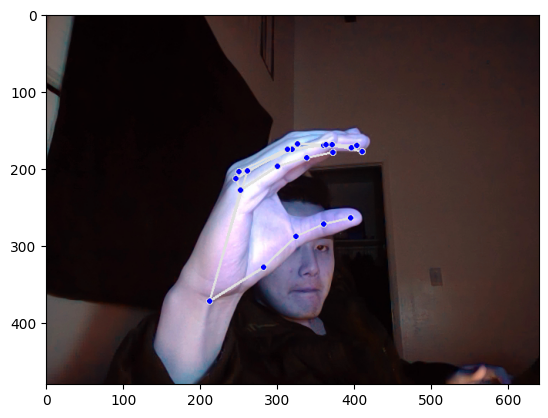

In [101]:
plt.imshow(image)
plt.show()

## Evaluation

In [ ]:
pred_test.shape

In [60]:
X_pred = model.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [61]:
X_pred.shape

(363, 26)

In [62]:
Y_pred = np.argmax(X_pred, axis=1)

In [63]:
Y_pred

array([ 8,  6, 25,  9,  1, 17, 12, 25, 19, 15,  8, 13, 10,  4,  5,  3,  6,
       19,  1, 16, 16,  0, 19, 15,  6, 11,  5,  7, 18,  6, 12, 19, 12, 11,
       23, 25,  7, 20, 25,  5, 18,  3,  2, 25, 23,  8,  6,  6, 11,  4,  0,
       15, 24,  8,  6, 13,  5, 24,  3,  4,  7, 18,  6,  7, 16, 21,  3, 15,
       22,  3,  2,  2, 20,  7, 23, 13, 10, 21,  9, 10, 14,  1,  4, 10, 18,
       17,  8,  7,  5,  3, 25,  3, 12, 12,  5, 10, 11, 17,  0, 21,  6, 23,
       18, 25,  1, 21,  8, 20,  7, 16,  5, 18, 14, 18, 21,  6, 11,  4, 25,
        4, 22,  6,  5, 25, 24, 11, 16, 11, 24,  6, 23,  1,  7, 21, 15,  7,
       14,  8, 21, 22,  5, 10, 16,  9, 14, 10, 12,  8, 16,  1,  7,  7,  0,
       25, 20, 11, 24, 20, 19, 15,  9, 11,  4, 14, 25, 13,  1,  3,  8,  5,
        1, 13,  0,  2, 17, 16, 21,  6, 22, 12, 24, 13, 13, 23, 17,  1, 21,
       21, 23, 19, 20, 22, 15,  3, 12, 16,  7, 11,  0, 24, 20,  9,  5,  5,
       14, 24, 22,  1, 21, 13, 21,  4,  4, 11,  2, 20, 14,  4, 15, 24, 18,
       10, 11, 17, 14,  0

In [65]:
y_pred_letter = [ alphabet[x] for x in Y_pred ]
y_pred_letter

['I',
 'G',
 'Z',
 'J',
 'B',
 'R',
 'M',
 'Z',
 'T',
 'P',
 'I',
 'N',
 'K',
 'E',
 'F',
 'D',
 'G',
 'T',
 'B',
 'Q',
 'Q',
 'A',
 'T',
 'P',
 'G',
 'L',
 'F',
 'H',
 'S',
 'G',
 'M',
 'T',
 'M',
 'L',
 'X',
 'Z',
 'H',
 'U',
 'Z',
 'F',
 'S',
 'D',
 'C',
 'Z',
 'X',
 'I',
 'G',
 'G',
 'L',
 'E',
 'A',
 'P',
 'Y',
 'I',
 'G',
 'N',
 'F',
 'Y',
 'D',
 'E',
 'H',
 'S',
 'G',
 'H',
 'Q',
 'V',
 'D',
 'P',
 'W',
 'D',
 'C',
 'C',
 'U',
 'H',
 'X',
 'N',
 'K',
 'V',
 'J',
 'K',
 'O',
 'B',
 'E',
 'K',
 'S',
 'R',
 'I',
 'H',
 'F',
 'D',
 'Z',
 'D',
 'M',
 'M',
 'F',
 'K',
 'L',
 'R',
 'A',
 'V',
 'G',
 'X',
 'S',
 'Z',
 'B',
 'V',
 'I',
 'U',
 'H',
 'Q',
 'F',
 'S',
 'O',
 'S',
 'V',
 'G',
 'L',
 'E',
 'Z',
 'E',
 'W',
 'G',
 'F',
 'Z',
 'Y',
 'L',
 'Q',
 'L',
 'Y',
 'G',
 'X',
 'B',
 'H',
 'V',
 'P',
 'H',
 'O',
 'I',
 'V',
 'W',
 'F',
 'K',
 'Q',
 'J',
 'O',
 'K',
 'M',
 'I',
 'Q',
 'B',
 'H',
 'H',
 'A',
 'Z',
 'U',
 'L',
 'Y',
 'U',
 'T',
 'P',
 'J',
 'L',
 'E',
 'O',
 'Z',
 'N',
 'B'

In [69]:
y_true = np.argmax(y_test, axis=1)

In [71]:
y_true_letter = [ alphabet[x] for x in y_true ]
y_true_letter

['I',
 'G',
 'Z',
 'J',
 'B',
 'R',
 'M',
 'Z',
 'T',
 'P',
 'I',
 'N',
 'K',
 'E',
 'F',
 'D',
 'G',
 'T',
 'B',
 'Q',
 'Q',
 'A',
 'T',
 'P',
 'G',
 'L',
 'F',
 'H',
 'S',
 'G',
 'M',
 'T',
 'M',
 'L',
 'X',
 'Z',
 'H',
 'U',
 'Z',
 'F',
 'S',
 'D',
 'C',
 'Z',
 'X',
 'I',
 'G',
 'G',
 'L',
 'E',
 'A',
 'P',
 'Y',
 'I',
 'R',
 'N',
 'F',
 'Y',
 'D',
 'E',
 'H',
 'S',
 'G',
 'H',
 'Q',
 'V',
 'D',
 'P',
 'W',
 'D',
 'C',
 'C',
 'U',
 'H',
 'X',
 'N',
 'K',
 'V',
 'J',
 'K',
 'O',
 'B',
 'E',
 'K',
 'S',
 'R',
 'I',
 'H',
 'F',
 'D',
 'Z',
 'D',
 'N',
 'M',
 'F',
 'K',
 'L',
 'R',
 'A',
 'V',
 'G',
 'X',
 'S',
 'Z',
 'B',
 'V',
 'I',
 'U',
 'H',
 'Q',
 'F',
 'S',
 'O',
 'S',
 'V',
 'G',
 'L',
 'E',
 'Z',
 'E',
 'W',
 'G',
 'F',
 'Z',
 'Y',
 'L',
 'Q',
 'L',
 'Y',
 'G',
 'X',
 'B',
 'H',
 'V',
 'P',
 'H',
 'O',
 'I',
 'V',
 'W',
 'F',
 'K',
 'Q',
 'J',
 'O',
 'K',
 'M',
 'I',
 'Q',
 'B',
 'H',
 'H',
 'A',
 'Z',
 'U',
 'L',
 'Y',
 'U',
 'T',
 'P',
 'J',
 'L',
 'E',
 'O',
 'Z',
 'N',
 'B'

In [72]:
list(zip(y_pred_letter,y_true_letter))

[('I', 'I'),
 ('G', 'G'),
 ('Z', 'Z'),
 ('J', 'J'),
 ('B', 'B'),
 ('R', 'R'),
 ('M', 'M'),
 ('Z', 'Z'),
 ('T', 'T'),
 ('P', 'P'),
 ('I', 'I'),
 ('N', 'N'),
 ('K', 'K'),
 ('E', 'E'),
 ('F', 'F'),
 ('D', 'D'),
 ('G', 'G'),
 ('T', 'T'),
 ('B', 'B'),
 ('Q', 'Q'),
 ('Q', 'Q'),
 ('A', 'A'),
 ('T', 'T'),
 ('P', 'P'),
 ('G', 'G'),
 ('L', 'L'),
 ('F', 'F'),
 ('H', 'H'),
 ('S', 'S'),
 ('G', 'G'),
 ('M', 'M'),
 ('T', 'T'),
 ('M', 'M'),
 ('L', 'L'),
 ('X', 'X'),
 ('Z', 'Z'),
 ('H', 'H'),
 ('U', 'U'),
 ('Z', 'Z'),
 ('F', 'F'),
 ('S', 'S'),
 ('D', 'D'),
 ('C', 'C'),
 ('Z', 'Z'),
 ('X', 'X'),
 ('I', 'I'),
 ('G', 'G'),
 ('G', 'G'),
 ('L', 'L'),
 ('E', 'E'),
 ('A', 'A'),
 ('P', 'P'),
 ('Y', 'Y'),
 ('I', 'I'),
 ('G', 'R'),
 ('N', 'N'),
 ('F', 'F'),
 ('Y', 'Y'),
 ('D', 'D'),
 ('E', 'E'),
 ('H', 'H'),
 ('S', 'S'),
 ('G', 'G'),
 ('H', 'H'),
 ('Q', 'Q'),
 ('V', 'V'),
 ('D', 'D'),
 ('P', 'P'),
 ('W', 'W'),
 ('D', 'D'),
 ('C', 'C'),
 ('C', 'C'),
 ('U', 'U'),
 ('H', 'H'),
 ('X', 'X'),
 ('N', 'N'),
 ('K', 'K'),

In [ ]:
y_test